# 深度学习入门与Pytorch|3.2 在jupyter中实现各种梯度算法动画

ref:
https://zhuanlan.zhihu.com/p/416705845?utm_id=0

## 代码准备

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
from ipywidgets import *
import math

sns.set_context('paper', font_scale=2)
sns.set_style('ticks')

def f_2d(x1, x2):
    '''original function to minimize'''
    return x1 ** 2 +  x2 ** 2

def f_grad(x1, x2):
    '''the gradient dfdx1 and dfdx2'''
    dfdx1 = 0.2 * x1
    dfdx2 = 4 * x2
    return dfdx1, dfdx2

def train_2d(trainer, lr):
    """Train a 2d object function with a customized trainer"""
    x1, x2 = -5, -2
    s_x1, s_x2 = 0, 0
    res = [(x1, x2)]
    for i in range(50):
        x1, x2, s_x1, s_x2, lr = trainer(x1, x2, s_x1, s_x2, lr)
        res.append((x1, x2))
    return res

def plot_2d(res, figsize=(10, 6), title=None):
    x1_, x2_ = zip(*res)
    fig = plt.figure(figsize=figsize)
    plt.plot([0], [0], 'r*', ms=15)
    plt.text(0.0, 0.25, 'minimum', color='w')
    plt.plot(x1_[0], x2_[0], 'ro', ms=10)
    plt.text(x1_[0]+0.1, x2_[0]+0.2, 'start', color='w')
    plt.plot(x1_, x2_, '-o', color='#ff7f0e')
 
    plt.plot(x1_[-1], x2_[-1], 'wo')
    plt.text(x1_[-1], x2_[-1]-0.25, 'end', color='w')
    x1 = np.linspace(-5.5, 3, 50)
    x2 = np.linspace(min(-3.0, min(x2_) - 1), max(3.0, max(x2_) + 1), 100)
    x1, x2 = np.meshgrid(x1, x2)
    plt.contourf(x1, x2, f_2d(x1, x2), cmap='rainbow')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

## 原始的梯度下降SGD

迭代公式
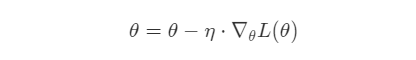

如下图，显然，学习率过小，则在指定迭代步长下损失函数可能会无法收敛至最小值；随着学习率的升高，在极小值处会越来越容易发生震荡，震荡幅度也会越来越大；最后当学习率过大，则可能会导致损失函数发散。

如果是在神经网络训练中出现了NaN，要考虑是否是学习率过大导致的。

In [3]:
def sgd(x1, x2, s1, s2, lr):
    dfdx1, dfdx2 = f_grad(x1, x2)
    return (x1 - lr * dfdx1, x2 - lr * dfdx2, 0, 0, lr)

@interact(lr=(0, 1, 0.001))
def visualize_gradient_descent(lr=0.05):
    res = train_2d(sgd, lr)
    plot_2d(res, title='SGD')

interactive(children=(FloatSlider(value=0.05, description='lr', max=1.0, step=0.001), Output()), _dom_classes=…

In [ ]:
## 带动量（momentum）的梯度下降

In [4]:
@interact(lr=(0, 0.99, 0.001), gamma=(0, 0.99, 0.001),
         continuous_update=False)
def visualize_sgd_momentum(lr=0.1, gamma=0.1):
    '''lr: learning rate
    gamma: parameter for momentum sgd'''
 
    def momentum(x1, x2, v1, v2, lr):
        dfdx1, dfdx2 = f_grad(x1, x2)
        v1 = gamma * v1 + lr * dfdx1
        v2 = gamma * v2 + lr * dfdx2
        x1 = x1 - v1
        x2 = x2 - v2
        return (x1, x2, v1, v2, lr)
 
    res = train_2d(momentum, lr)
    plot_2d(res, title='momentum')

interactive(children=(FloatSlider(value=0.1, description='lr', max=0.99, step=0.001), FloatSlider(value=0.1, d…

## 带惯性的梯度下降

In [5]:
@interact(lr=(0, 0.99, 0.01), gamma=(0, 0.99, 0.01),
          continuous_update=False)
def visualize_sgd_inertia(lr=0.1, gamma=0.1):
    '''lr: learning rate
    gamma: parameter for inertia sgd'''
 
    def inertia(x1, x2, v1, v2, lr):
        dfdx1, dfdx2 = f_grad(x1, x2)
        v1 = gamma * v1 + (1 - gamma) * dfdx1
        v2 = gamma * v2 + (1 - gamma) * dfdx2
        x1 = x1 - lr * v1
        x2 = x2 - lr * v2
        return (x1, x2, v1, v2, lr)
 
    res = train_2d(inertia, lr)
    plot_2d(res, title='inertia')

interactive(children=(FloatSlider(value=0.1, description='lr', max=0.99, step=0.01), FloatSlider(value=0.1, de…

## 自适应梯度下降Adagrad

In [6]:
@interact(lr=(0, 4, 0.01),
          continuous_update=False)
def visualize_adagrad(lr=0.1):
    '''lr: learning rate'''
    def adagrad_2d(x1, x2, s1, s2, lr):
        g1, g2 = f_grad(x1, x2)
        eps = 1e-6
        s1 += g1 ** 2
        s2 += g2 ** 2
        x1 -= lr / math.sqrt(s1 + eps) * g1
        x2 -= lr / math.sqrt(s2 + eps) * g2
        return x1, x2, s1, s2, lr
 
    res = train_2d(adagrad_2d, lr)
    plot_2d(res, title='adagrad')

interactive(children=(FloatSlider(value=0.1, description='lr', max=4.0, step=0.01), Output()), _dom_classes=('…

## RMSProp算法（AdaDelta）

In [7]:
@interact(lr=(0, 1, 0.001), 
          gamma=(0, 0.99, 0.001),
          continuous_update=False)
def visualize_rmsprop(lr=0.1, gamma=0.9):
    '''lr: learning rate, 
       gamma: momentum'''  
    def rmsprop_2d(x1, x2, s1, s2, lr):
        eps = 1e-6
        g1, g2 = f_grad(x1, x2)
        s1 = gamma * s1 + (1 - gamma) * g1 ** 2
        s2 = gamma * s2 + (1 - gamma) * g2 ** 2
        x1 -= lr / math.sqrt(s1 + eps) * g1
        x2 -= lr / math.sqrt(s2 + eps) * g2
        return x1, x2, s1, s2, lr

    res = train_2d(rmsprop_2d, lr)
    plot_2d(res, title='rmsprop')

interactive(children=(FloatSlider(value=0.1, description='lr', max=1.0, step=0.001), FloatSlider(value=0.9, de…

## Adam算法

In [8]:
@interact(lr=(0, 1, 0.001), 
          beta1=(0, 0.999, 0.001),
          beta2=(0, 0.999, 0.001),
          continuous_update=False)
def visualize_adam(lr=0.1, beta1=0.9, beta2=0.999):
    '''lr: learning rate
    beta1: parameter for E(g)
    beta2: parameter for E(g^2)
    '''  
    def Deltax(m, n, g, t):
        eps = 1.0E-6
        m = beta1 * m + (1 - beta1) * g
        n = beta2 * n + (1 - beta2) * g*g
        m_hat = m / (1 - beta1**t)
        n_hat = n / (1 - beta2**t)
        dx = lr * m_hat / (math.sqrt(n_hat) + eps)
        return m, n, dx
 
    def adam_2d(x1, x2, m1, n1, m2, n2, lr, t):
        '''m1, m2: E(g1), E(g2)
           n1, n2: E(g1^2), E(g2^2) where E() is expectation
           lr: learning rate
           t: time step'''
        eps = 1e-6
        g1, g2 = f_grad(x1, x2)
        m1, n1, dx1 = Deltax(m1, n1, g1, t)
        m2, n2, dx2 = Deltax(m2, n2, g2, t)       
        x1 -= dx1
        x2 -= dx2
        return x1, x2, m1, n1, m2, n2, lr
 
    def train_adam(trainer, lr):
        """Train a 2d object function with a customized trainer"""
        x1, x2 = -5, -2
        m1, n1, m2, n2 = 0, 0, 0, 0
        res = [(x1, x2)]
        for i in range(30):
            x1, x2, m1, n1, m2, n2, lr = trainer(x1, x2, m1, n1, m2, n2, lr, i+1)
            res.append((x1, x2))
        return res
 
    res = train_adam(adam_2d, lr)
    plot_2d(res, title='adam')

interactive(children=(FloatSlider(value=0.1, description='lr', max=1.0, step=0.001), FloatSlider(value=0.9, de…